In [1]:
#1. this is a supervised approach since we want to analyze the relationship b/w the variables.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_df = pd.read_csv('data_h3_3337.csv')
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data_df.info() 
#there are a total of 200 observations. there are no missing values (200 non-null in each columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data_df.nunique()
#the no. of unique values are displayed below.

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


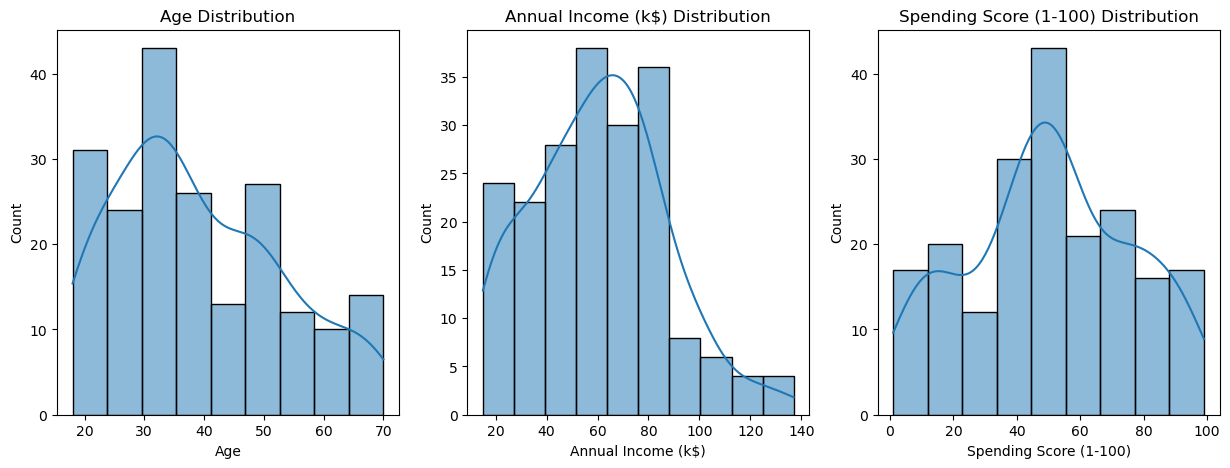

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

sns.histplot(data=data_df,x='Age',kde=True,ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data=data_df,x='Annual Income (k$)',kde=True,ax=axes[1])
axes[1].set_title('Annual Income (k$) Distribution')

sns.histplot(data=data_df,x='Spending Score (1-100)',kde=True,ax=axes[2])
axes[2].set_title('Spending Score (1-100) Distribution')

plt.show()

#age is skewed to the right, and annual income seems to have a normal distribution. spending score is also relatively
#normal.

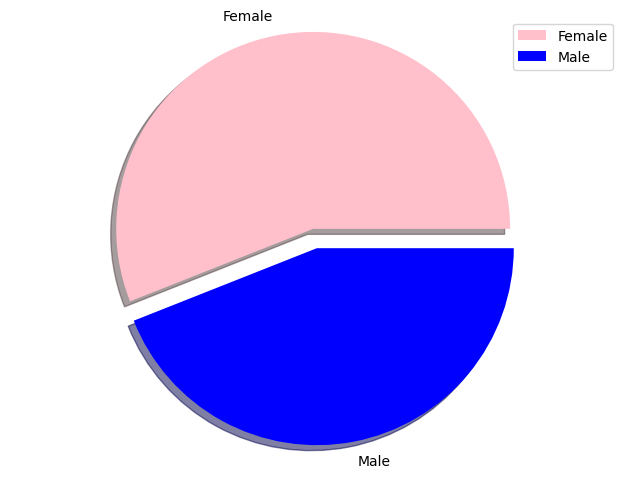

In [15]:
plt.pie(data_df['Gender'].value_counts(),labels=['Female','Male'],colors=['Pink','Blue'],shadow=True,explode=[0,0.1])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
#there are more females in our observations, kind of inbalanced and results can be biased.

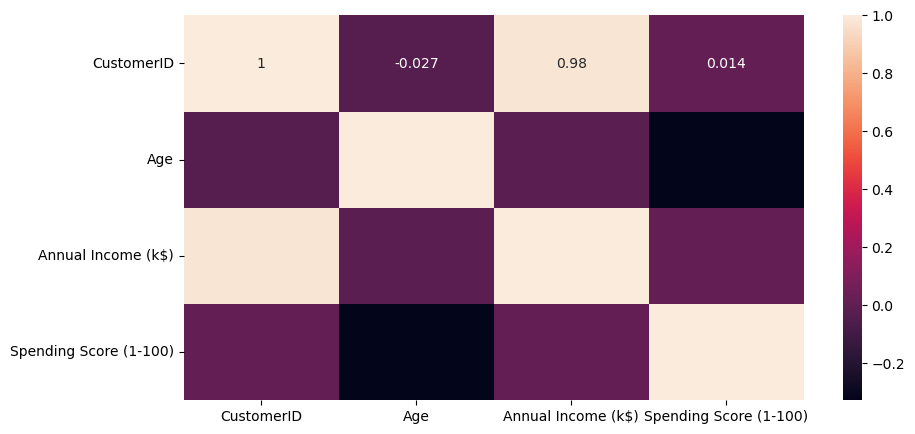

In [19]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(data_df.drop('Gender',axis=1).corr(), annot=True)
plt.show()
#age has almost no correlation with spending score

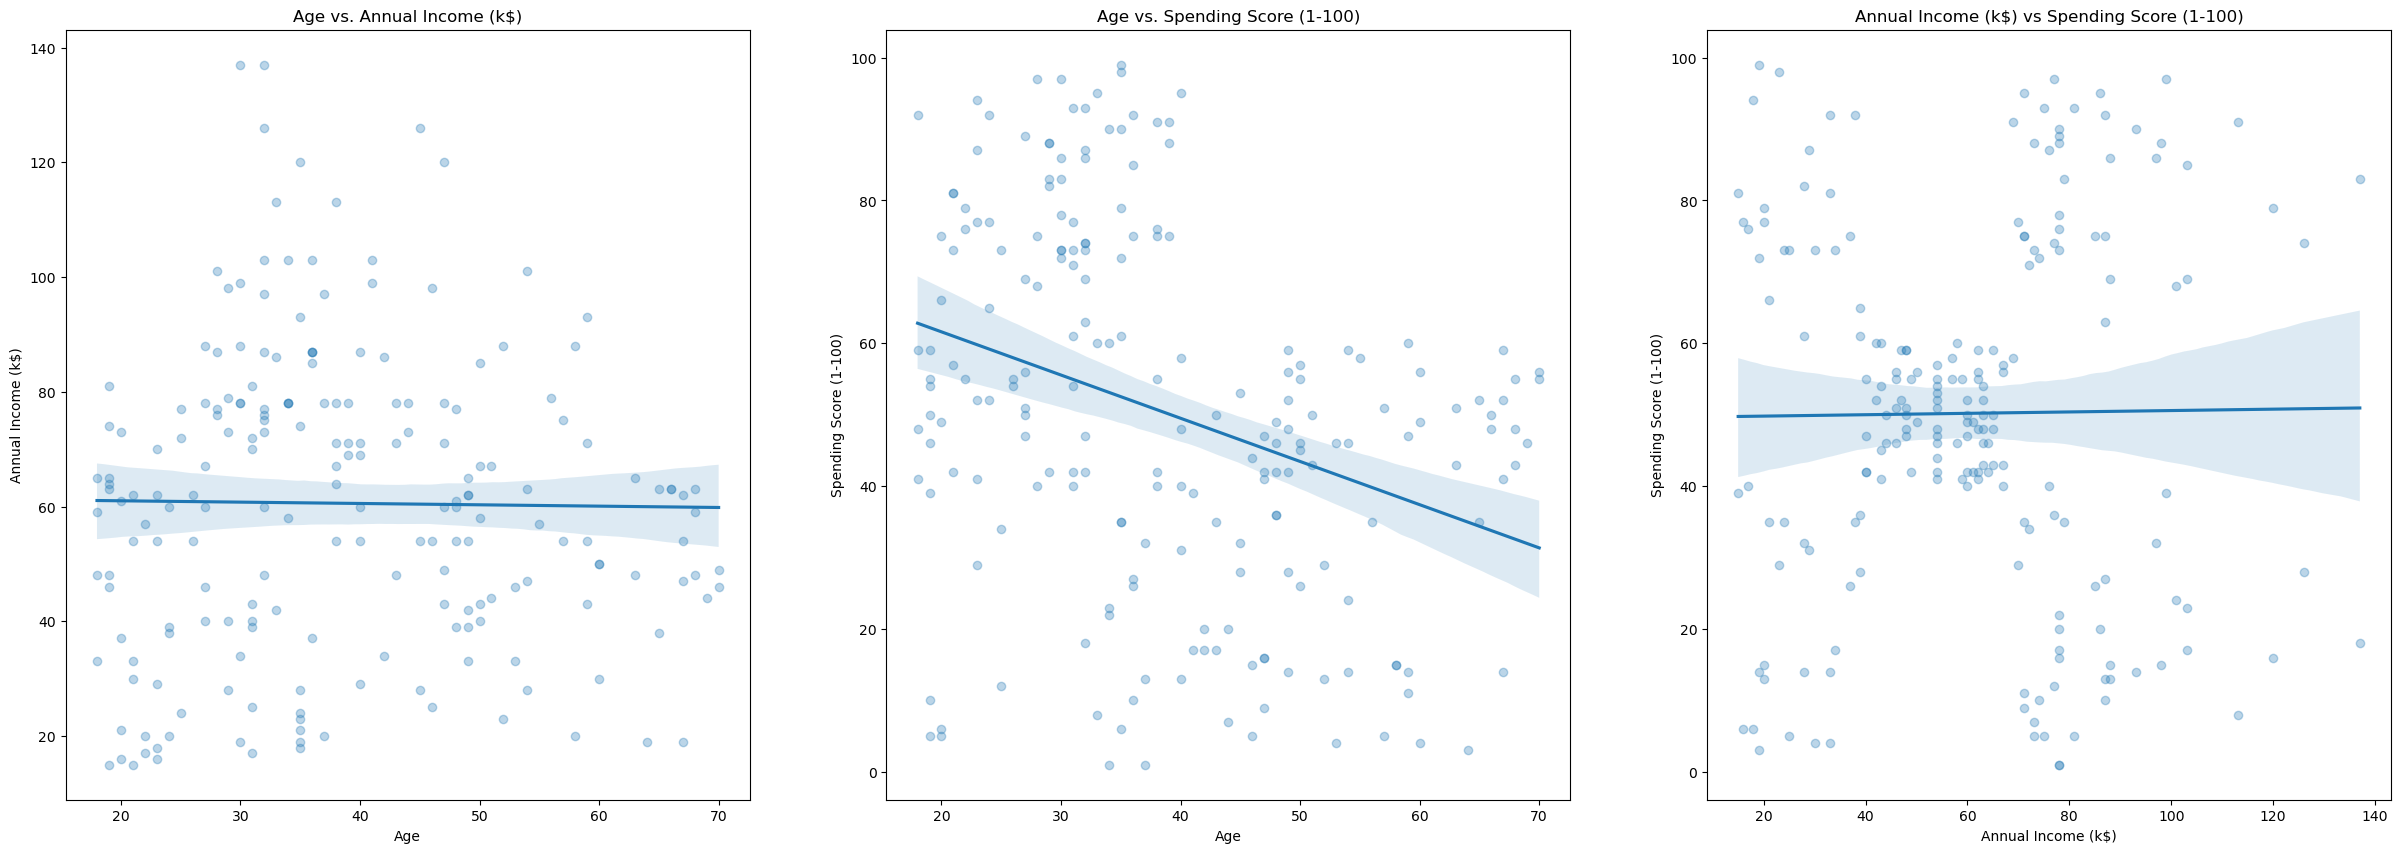

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(30,10))

sns.regplot(x='Age',y='Annual Income (k$)',data=data_df,ax=axes[0],scatter_kws={"alpha":0.3})
axes[0].set_title('Age vs. Annual Income (k$)')

sns.regplot(x='Age',y='Spending Score (1-100)',data=data_df,ax=axes[1],scatter_kws={"alpha":0.3})
axes[1].set_title('Age vs. Spending Score (1-100)')

sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data_df,ax=axes[2],scatter_kws={"alpha":0.3})
axes[2].set_title('Annual Income (k$) vs Spending Score (1-100)')

plt.show()

#age vs. annual income and annual income vs. spending score seems to be not correlated, but age vs spending score
# seems to have a negative relationship.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


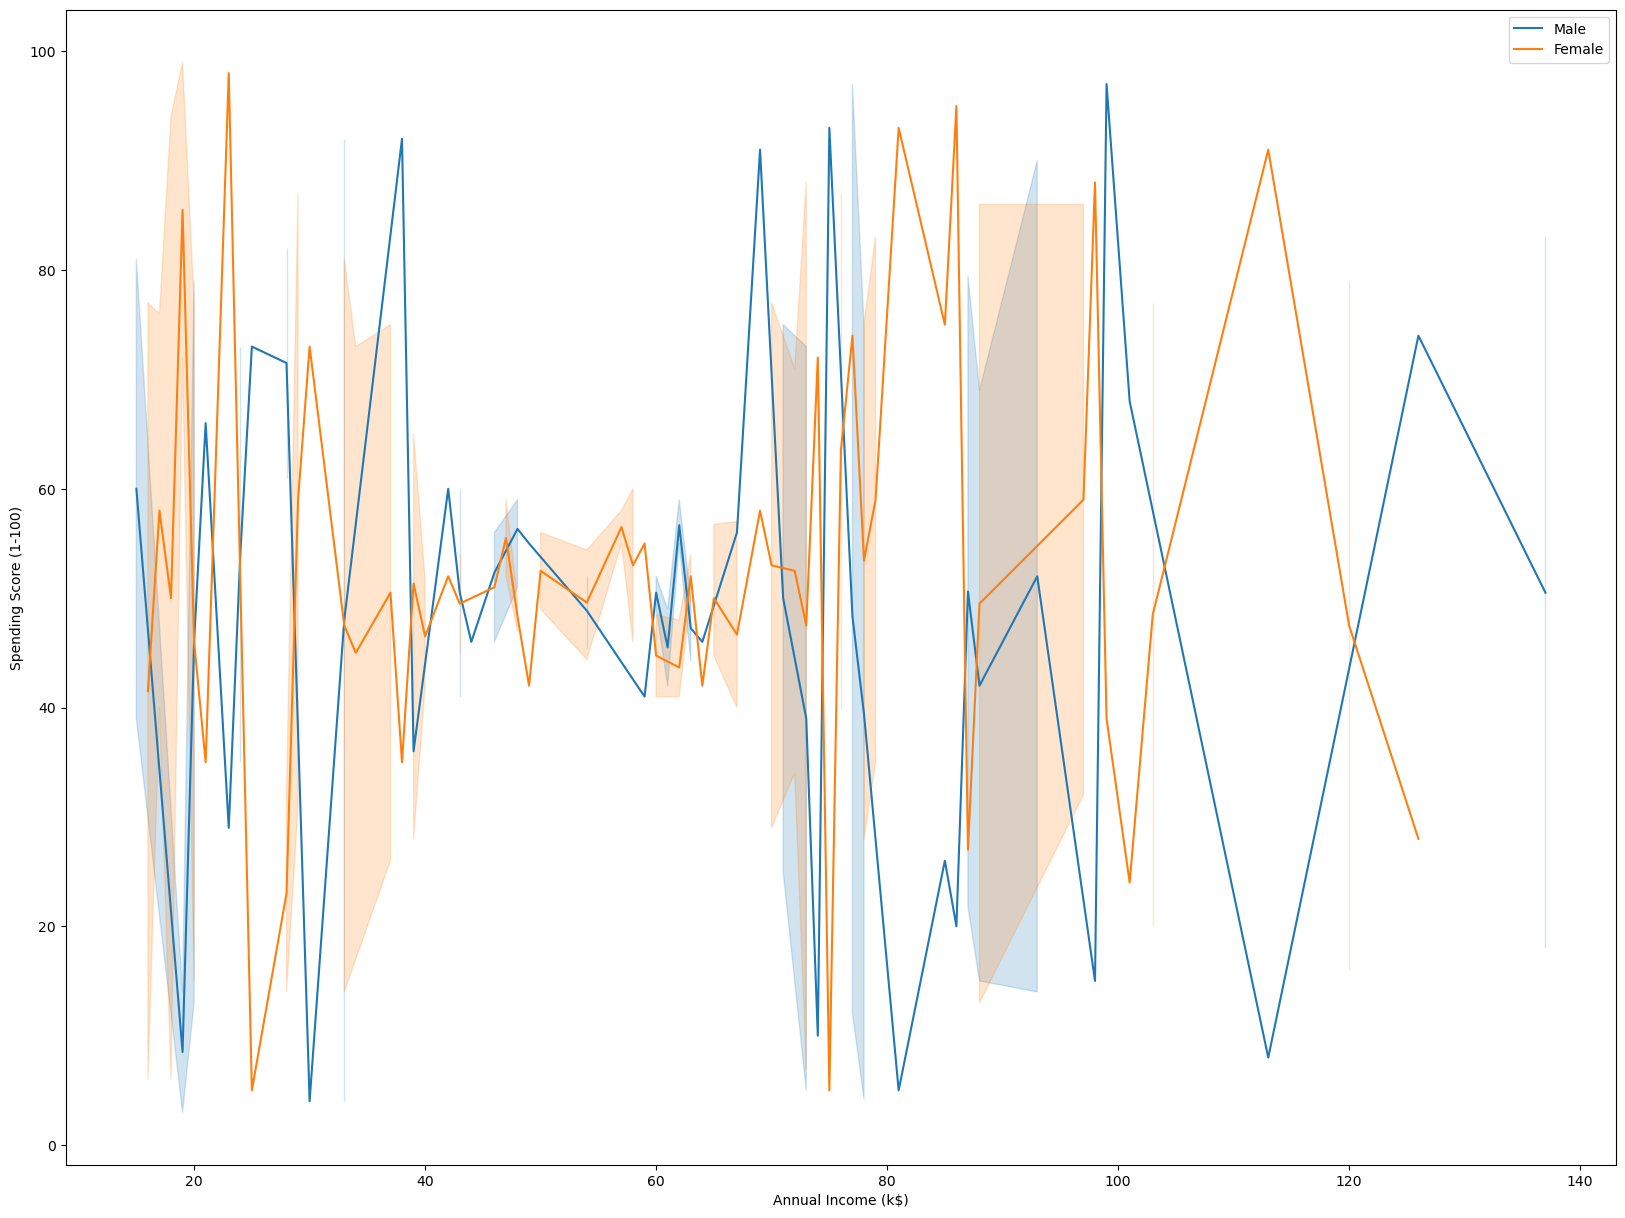

In [33]:
fig = plt.figure(figsize=(20,15))
sns.lineplot(data=data_df,x="Annual Income (k$)",y='Spending Score (1-100)',hue='Gender')
plt.legend()
plt.show()
#females seem to have more spending scores.

In [55]:
X = data_df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X = pd.DataFrame(X)
X.columns = ['P1','P2']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

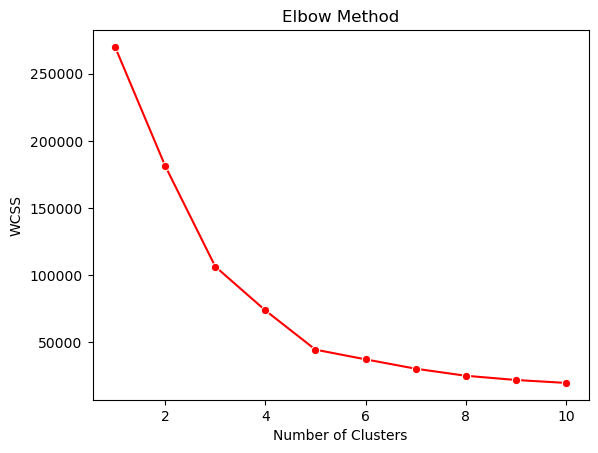

In [36]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
sns.lineplot(x=range(1,11),y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_pred = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


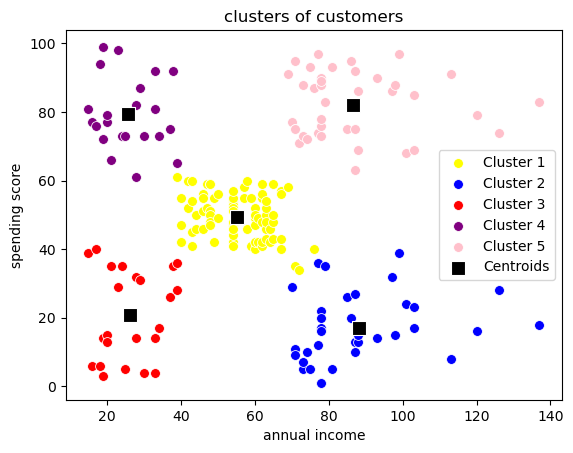

In [38]:
sns.scatterplot(x=X[y_pred==0, 0], y=X[y_pred==0,1],color='yellow',label='Cluster 1',s=50)
sns.scatterplot(x=X[y_pred==1, 0], y=X[y_pred==1,1],color='blue',label='Cluster 2',s=50)
sns.scatterplot(x=X[y_pred==2, 0], y=X[y_pred==2,1],color='red',label='Cluster 3',s=50)
sns.scatterplot(x=X[y_pred==3, 0], y=X[y_pred==3,1],color='purple',label='Cluster 4',s=50)
sns.scatterplot(x=X[y_pred==4, 0], y=X[y_pred==4,1],color='pink',label='Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color='black',label='Centroids',s=100,marker=',')

plt.title('clusters of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

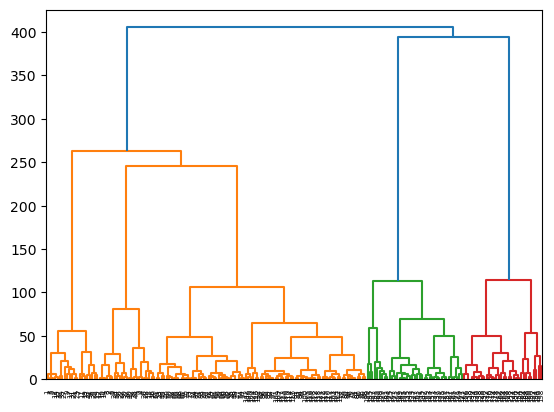

In [39]:
import scipy.cluster.hierarchy as shc 

Dendrogram = shc.dendrogram((shc.linkage(X,method='ward')))

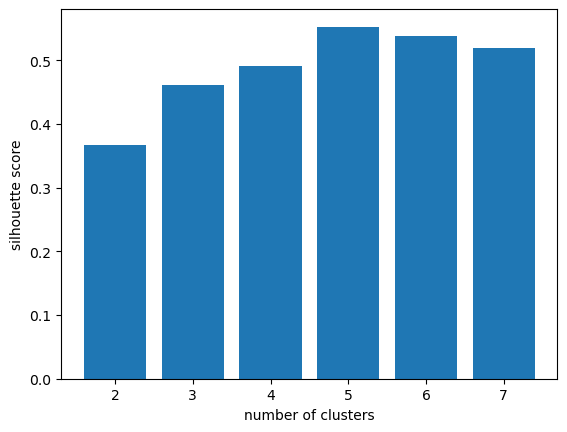

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2,8):
    silhouette_scores.append(silhouette_score(X, 
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)))
    
plt.bar(x=range(2,8),height=silhouette_scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

#I will pick 5 as the no. of clusters.

In [41]:
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

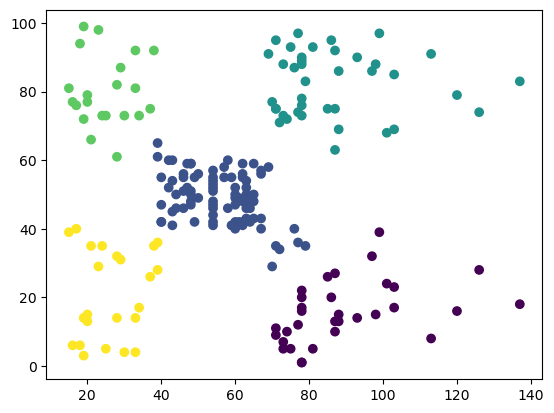

In [57]:
plt.scatter(X['P1'],X['P2'].values,c=agg.fit_predict(X))
plt.show()


In [ ]:
#k-means clustering partitions the data into k clusters. it does this by choosing k seed points randomly, computing
#their distance from each points, and assigning the closest points to it. after forming the cluster, the new mean is
#computed for the new centroids. it is good for online learning, but requires a lot of memory and is sensitive to outliers

#hierarchical clustering measures the distance of each point, and creates a dendrogram accordingly. it doesn't require
#to pre-specify the number of clusters. it works with large data but again requires a lot of memory.

